In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import nbformat
from sklearn.decomposition import PCA

### Load the csv file

In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\Finlatics\datacleaning_project\car_prices.csv\car_prices.csv")

### Get the shape of the dataset

In [3]:
df.shape

(558837, 15)

### get the datatypes of all columns

In [4]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
dtype: object

### Get the information of all the data i.e; number of non null values in each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 64.0+ MB


### number of null values in all columns

In [6]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
dtype: int64

### Get the correlation between columns

<Axes: >

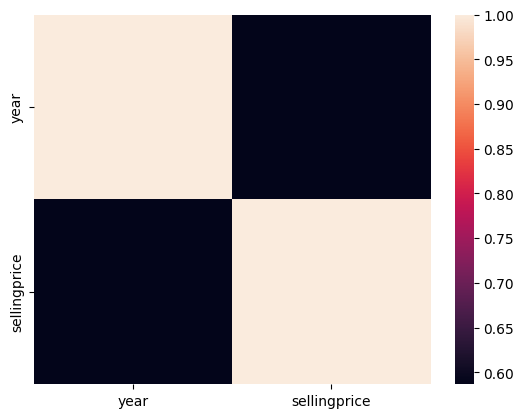

In [7]:
sns.heatmap(df[['year','sellingprice']].corr(method='pearson'))

### Different values in make column

In [8]:
df['make'].value_counts().nunique()

78

### Fill the missing values in make by most frequently occuring value

In [9]:

df['make'].fillna(df['make'].mode().iat[0],inplace=True)

### Different values in vin column

In [10]:
df['vin'].value_counts()

vin
automatic            22
wbanv13588cz57827     5
5uxfe43579l274932     4
trusc28n241022003     4
wddgf56x78f009940     4
                     ..
1p3ew65g7yv603989     1
4t1bf28b1yu016829     1
jtdbt1231y0082703     1
jtddr32t8y0063746     1
1ftfw1et2eke87277     1
Name: count, Length: 550297, dtype: int64

### Fill the missing values in vin with most frequently occuring value

In [11]:
df['vin'].fillna(df['vin'].mode().iat[0],inplace=True)

### Different values in model column

In [12]:
df['model'].value_counts().nunique()

443

In [13]:
df['model']=df['model'].replace('f150','F-150')

In [14]:
df['model'].fillna(method='ffill',inplace=True)

In [15]:
df['trim'].value_counts()

trim
Base                 55817
SE                   43648
LX                   20757
Limited              18367
LT                   16915
                     ...  
xls                      1
series m                 1
4x2 reg silverado        1
4x2 v6 limited           1
Power Wagon              1
Name: count, Length: 1963, dtype: int64

In [16]:
df['trim'].fillna(method='ffill',inplace=True)

In [17]:
df['body'].value_counts()

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 87, dtype: int64

In [18]:
df['body'].fillna(df['body'].mode().iat[0],inplace=True)

In [19]:
df['transmission'].value_counts()

transmission
automatic    475915
manual        17544
sedan            15
Sedan            11
Name: count, dtype: int64

In [20]:
df['transmission']=df['transmission'].replace('sedan','Sedan')

In [21]:
df['transmission'].fillna('automatic',inplace=True)

In [22]:
df['condition'].value_counts()

condition
19.0    42281
35.0    26750
37.0    25938
44.0    25514
43.0    24937
42.0    24328
36.0    23144
41.0    23073
2.0     20790
4.0     19922
39.0    19920
28.0    19178
29.0    18928
38.0    18723
34.0    17398
27.0    16351
49.0    13099
48.0    12712
46.0    12634
25.0    12561
45.0    12313
26.0    11912
47.0    11363
5.0     11222
3.0     10803
33.0    10619
32.0     9962
24.0     9326
31.0     9222
21.0     9199
23.0     8188
1.0      7364
22.0     6057
18.0      323
17.0      243
16.0      178
15.0      144
14.0      134
12.0       95
11.0       87
13.0       82
Name: count, dtype: int64

In [23]:
df['condition'].fillna(df['condition'].median(),inplace=True)

In [24]:
df['odometer'].value_counts()

odometer
1.0         1318
999999.0      72
10.0          29
21587.0       21
29137.0       18
            ... 
84791.0        1
184061.0       1
113144.0       1
201099.0       1
262065.0       1
Name: count, Length: 172278, dtype: int64

In [25]:
df.dropna(subset=['odometer'],inplace=True)

In [26]:
df['color'].value_counts()

color
black        110958
white        106655
silver        83378
gray          82848
blue          51130
red           43562
—             24685
green         11378
gold          11337
beige          9215
burgundy       8970
brown          6715
orange         2077
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64

In [27]:
df['color'].fillna(df['color'].mode().iat[0],inplace=True)

In [28]:
df['interior'].value_counts()

interior
black        244315
gray         178555
beige         59753
tan           44086
—             17044
brown          8638
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

In [29]:
df['interior'].fillna(df['interior'].mode().iat[0],inplace=True)

In [30]:
df['mmr'].value_counts()

mmr
12500.0     1761
11600.0     1751
11650.0     1746
12150.0     1721
11850.0     1717
            ... 
172000.0       1
134000.0       1
113000.0       1
154000.0       1
164000.0       1
Name: count, Length: 1101, dtype: int64

In [31]:
df['mmr'].median()

12250.0

In [32]:
df['mmr'].fillna(df['mmr'].median,inplace=True)

In [33]:
df.dropna(subset='sellingprice',inplace=True)

In [34]:
df['mmr']=pd.to_numeric(df['mmr'],errors='coerce')

In [35]:
df.dropna(subset='mmr',inplace=True)

### Check the missing values in all columns

In [36]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [37]:
df.shape

(558705, 15)

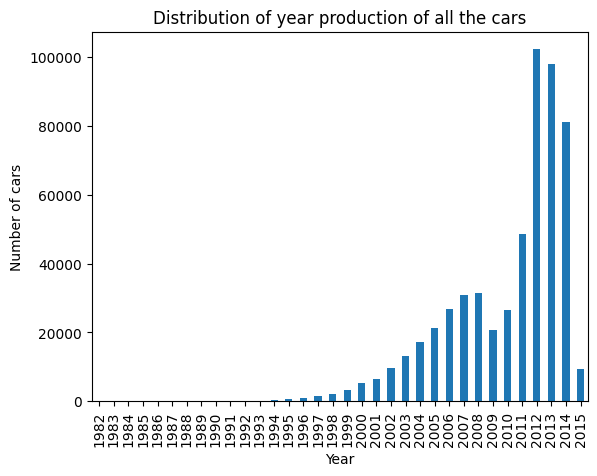

In [38]:
year_counts=df['year'].value_counts().sort_index()
year_counts.plot(kind="bar",title="Distribution of year production of all the cars")
plt.xlabel('Year')
plt.ylabel('Number of cars')
plt.show()

In [39]:
model_label=df['model'].values
model_counts=df['model'].value_counts()
model_count=model_counts[model_counts>2000]
model_count

model
Altima      19678
F-150       14799
Fusion      12984
Camry       12693
Escape      11964
            ...  
TL           2166
Pilot        2074
Accent       2048
Acadia       2044
Traverse     2029
Name: count, Length: 71, dtype: int64

fig=go.Figure(data=[go.Pie(labels=model_label, values=model_count)])
fig.update_layout(title_text='Pie Chart representing car models')
fig.show()

In [40]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


In [41]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558705.000000,558705.000000,558705.000000,558705.000000,558705.000000
mean,2010.039695,30.763884,68323.830415,13770.846869,13612.941760
std,3.965952,13.275806,53398.133653,9679.645290,9749.387229
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,24.000000,28374.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52257.000000,12250.000000,12100.000000
75%,2013.000000,41.000000,99114.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [42]:
df.drop(columns=['make','model','trim','vin','seller'],inplace=True)

In [43]:
df.head()

,year,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice
0,2015,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0
1,2015,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0
4,2014,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0


In [44]:
X=df.iloc[:, :-1]
y=df.iloc[:, 9]

In [45]:
X

,year,body,transmission,state,condition,odometer,color,interior,mmr
0,2015,SUV,automatic,ca,5.0,16639.0,white,black,20500.0
1,2015,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0
2,2014,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0
3,2015,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0
4,2014,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0
...,...,...,...,...,...,...,...,...,...
558832,2015,Sedan,automatic,in,45.0,18255.0,silver,black,35300.0
558833,2012,Crew Cab,automatic,wa,5.0,54393.0,white,black,30200.0
558834,2012,SUV,automatic,ca,48.0,50561.0,black,black,29800.0
558835,2015,sedan,automatic,ga,38.0,16658.0,white,black,15100.0


In [46]:
y

0         21500.0
1         21500.0
2         30000.0
3         27750.0
4         67000.0
           ...   
558832    33000.0
558833    30800.0
558834    34000.0
558835    11100.0
558836    26700.0
Name: sellingprice, Length: 558705, dtype: float64

In [47]:
body_dummies = pd.get_dummies(X['body'],dtype='int',drop_first=True)


# Save the new dataframe to a CSV file
body_dummies

,Beetle Convertible,CTS Coupe,CTS Wagon,CTS-V Coupe,CTS-V Wagon,Cab Plus,Cab Plus 4,Club Cab,Convertible,Coupe,...,regular-cab,sedan,supercab,supercrew,suv,transit van,tsx sport wagon,van,wagon,xtracab
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558835,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
transmission_dummies=pd.get_dummies(X['transmission'],dtype='int',drop_first=True)
transmission_dummies

,manual
0,0
1,0
2,0
3,0
4,0
...,...
558832,0
558833,0
558834,0
558835,0


In [49]:
state_dummies = pd.get_dummies(X['state'],dtype='int',drop_first=True)


# Save the new dataframe to a CSV file
state_dummies

,al,az,ca,co,fl,ga,hi,il,in,la,...,pa,pr,qc,sc,tn,tx,ut,va,wa,wi
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
558833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
558834,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
558835,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
color_dummies = pd.get_dummies(X['color'],dtype='int',drop_first=True)


# Save the new dataframe to a CSV file
color_dummies

,black,blue,brown,burgundy,charcoal,gold,gray,green,lime,off-white,orange,pink,purple,red,silver,turquoise,white,yellow,—
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
558833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
558834,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
558835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
interior_dummies = pd.get_dummies(X['interior'],dtype='int', drop_first=True)


# Save the new dataframe to a CSV file
interior_dummies

,black,blue,brown,burgundy,gold,gray,green,off-white,orange,purple,red,silver,tan,white,yellow,—
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
558833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
558834,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
558835,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
X.drop(columns=['body','transmission','state','color','interior'],inplace=True)

In [53]:
X=pd.concat([X,body_dummies,transmission_dummies,state_dummies,color_dummies,interior_dummies],axis=1)

In [54]:
X.head()

,year,condition,odometer,mmr,Beetle Convertible,CTS Coupe,CTS Wagon,CTS-V Coupe,CTS-V Wagon,Cab Plus,...,green,off-white,orange,purple,red,silver,tan,white,yellow,—
0,2015,5.0,16639.0,20500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,5.0,9393.0,20800.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,45.0,1331.0,31900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,41.0,14282.0,27500.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,43.0,2641.0,66000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X.dtypes

year                    int64
condition             float64
odometer              float64
mmr                   float64
Beetle Convertible      int32
                       ...   
silver                  int32
tan                     int32
white                   int32
yellow                  int32
—                       int32
Length: 162, dtype: object

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

In [57]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=3)

In [58]:
X_train.shape

(446964, 162)

In [59]:
y_train.shape

(446964,)

In [60]:
X.dtypes

year                    int64
condition             float64
odometer              float64
mmr                   float64
Beetle Convertible      int32
                       ...   
silver                  int32
tan                     int32
white                   int32
yellow                  int32
—                       int32
Length: 162, dtype: object

In [61]:
X.isnull().sum()

year                  0
condition             0
odometer              0
mmr                   0
Beetle Convertible    0
                     ..
silver                0
tan                   0
white                 0
yellow                0
—                     0
Length: 162, dtype: int64

In [62]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [63]:
X_train_prediction=model.predict(X_train)
train_mse=mean_squared_error(y_train,X_train_prediction)
train_r2 =r2_score(y_train,X_train_prediction)
print("train_mse")
print(train_mse)
print("train_r2")
print(train_r2)

train_mse
2799775.6755698835
train_r2
0.97056704418018


In [64]:
X_test_prediction=model.predict(X_test)
test_mse=mean_squared_error(y_test,X_test_prediction)
test_r2 =r2_score(y_test,X_test_prediction)
print("test_mse")
print(test_mse)
print("test_r2")
print(test_r2)

test_mse
2837684.234948133
test_r2
0.9700528338931399


In [65]:
model1= Ridge(alpha=1.0)
model1.fit(X_train,y_train)

Ridge()

In [66]:
X_train_prediction_ridge=model1.predict(X_train)
train_mse_ridge=mean_squared_error(y_train,X_train_prediction_ridge)
train_r2_ridge =r2_score(y_train,X_train_prediction_ridge)
print("train_mse_ridge")
print(train_mse_ridge)
print("train_r2_ridge")
print(train_r2_ridge)

train_mse_ridge
2799833.390941043
train_r2_ridge
0.9705664374408671


In [67]:
X_test_prediction_ridge=model1.predict(X_test)
test_mse_ridge=mean_squared_error(y_test,X_test_prediction_ridge)
test_r2_ridge =r2_score(y_test,X_test_prediction_ridge)
print("test_mse_ridge")
print(test_mse_ridge)
print("test_r2_ridge")
print(test_r2_ridge)

test_mse_ridge
2837613.9555178587
test_r2_ridge
0.9700535755788238


In [68]:
model2= DecisionTreeRegressor()
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [69]:
X_train_prediction_tree=model2.predict(X_train)
train_mse_tree=mean_squared_error(y_train,X_train_prediction_tree)
train_r2_tree =r2_score(y_train,X_train_prediction_tree)
print("train_mse_tree")
print(train_mse_tree)
print("train_r2_tree")
print(train_r2_tree)

train_mse_tree
1.6108679893682714
train_r2_tree
0.9999999830655696


In [70]:
X_test_prediction_tree=model2.predict(X_test)
test_mse_tree=mean_squared_error(y_test,X_test_prediction_tree)
test_r2_tree =r2_score(y_test,X_test_prediction_tree)
print("test_mse_tree")
print(test_mse_tree)
print("test_r2_tree")
print(test_r2_tree)

test_mse_tree
4714202.136216787
test_r2_tree
0.9502492233998758


In [71]:
model3=GradientBoostingRegressor(n_estimators=20, learning_rate=0.1, random_state=3)
model3.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=20, random_state=3)

In [72]:
X_train_prediction_gb=model3.predict(X_train)
train_mse_gb=mean_squared_error(y_train,X_train_prediction_gb)
train_r2_gb =r2_score(y_train,X_train_prediction_gb)
print("train_mse_gb")
print(train_mse_gb)
print("train_r2_gb")
print(train_r2_gb)

train_mse_gb
4848770.202428394
train_r2_gb
0.949026759395827


In [73]:
X_test_prediction_gb=model3.predict(X_test)
test_mse_gb=mean_squared_error(y_test,X_test_prediction_gb)
test_r2_gb =r2_score(y_test,X_test_prediction_gb)
print("test_mse_gb")
print(test_mse_gb)
print("test_r2_gb")
print(test_r2_gb)

test_mse_gb
4859738.097660853
test_r2_gb
0.9487133267845265


In [74]:
model4=RandomForestRegressor(n_estimators=20, random_state=3)
model4.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=3)

In [75]:
X_train_prediction_forest=model4.predict(X_train)
train_mse_forest=mean_squared_error(y_train,X_train_prediction_forest)
train_r2_forest =r2_score(y_train,X_train_prediction_forest)
print("train_mse_forest")
print(train_mse_forest)
print("train_r2_forest")
print(train_r2_forest)

train_mse_forest
385922.6102891508
train_r2_forest
0.9959429452732144


In [76]:
X_test_prediction_forest=model4.predict(X_test)
test_mse_forest=mean_squared_error(y_test,X_test_prediction_forest)
test_r2_forest =r2_score(y_test,X_test_prediction_forest)
print("test_mse_forest")
print(test_mse_forest)
print("test_r2_forest")
print(test_r2_forest)

test_mse_forest
2580631.362670192
test_r2_forest
0.9727656110829155
